In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv', encoding='latin-1')
test = pd.read_csv('/kaggle/input/titanic/test.csv', encoding='latin-1')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **VISUALISASI**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
count_sex = train['Sex'].value_counts()

index_sex = count_sex.index
values_sex = count_sex.values

In [13]:
index_sex

Index(['male', 'female'], dtype='object', name='Sex')

In [14]:
values_sex

array([577, 314])

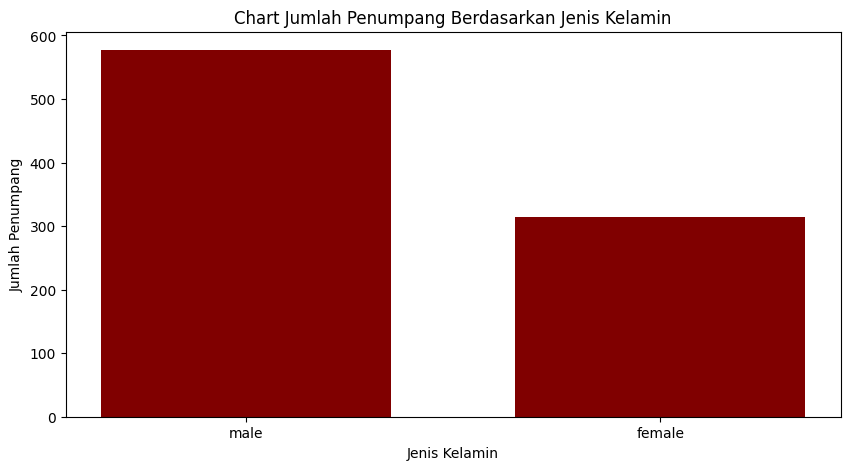

In [15]:
fig = plt.figure(figsize = (10, 5))
plt.bar(index_sex, values_sex, color = 'maroon',width = 0.7)

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.title('Chart Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

In [16]:
def barchart(column) :
  count = train[column].value_counts()

  index = count.index
  value = count.values

  fig = plt.figure(figsize = (10,5))
  plt.bar(index,value,color = 'maroon', width=0.7)

  plt.show()

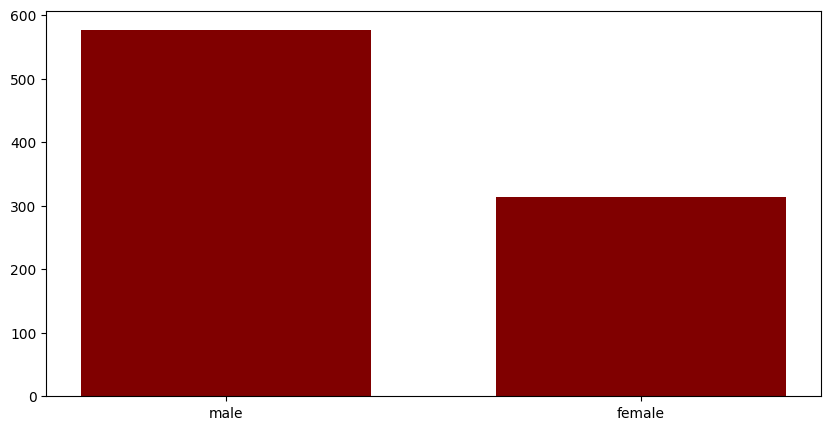

In [17]:
barchart('Sex')

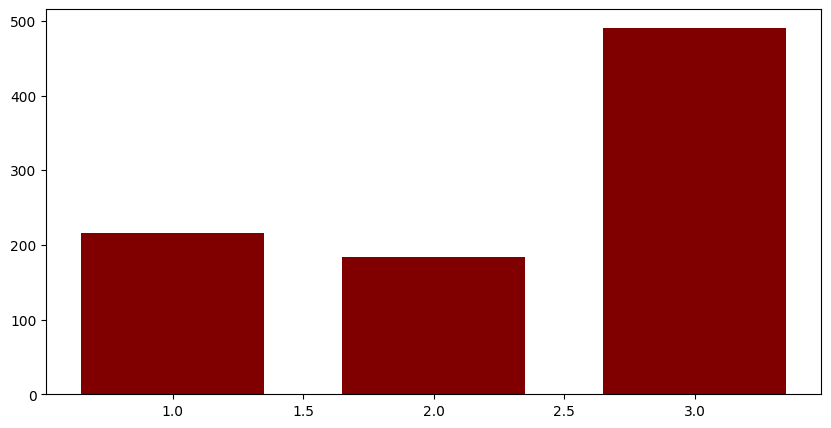

In [18]:
barchart('Pclass')

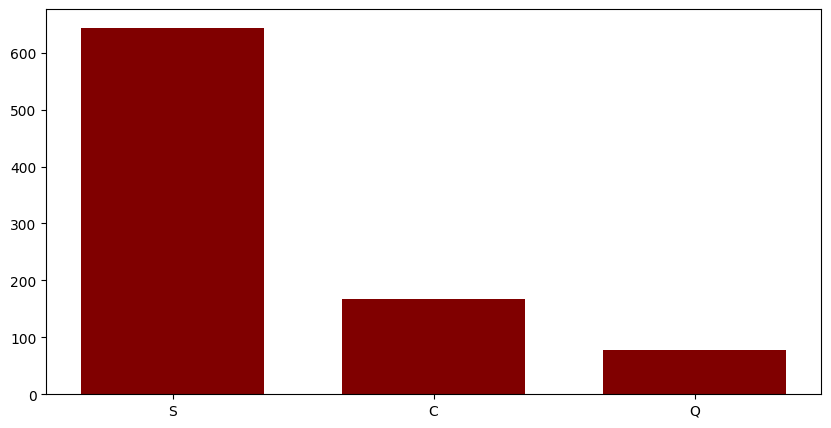

In [19]:
barchart('Embarked')

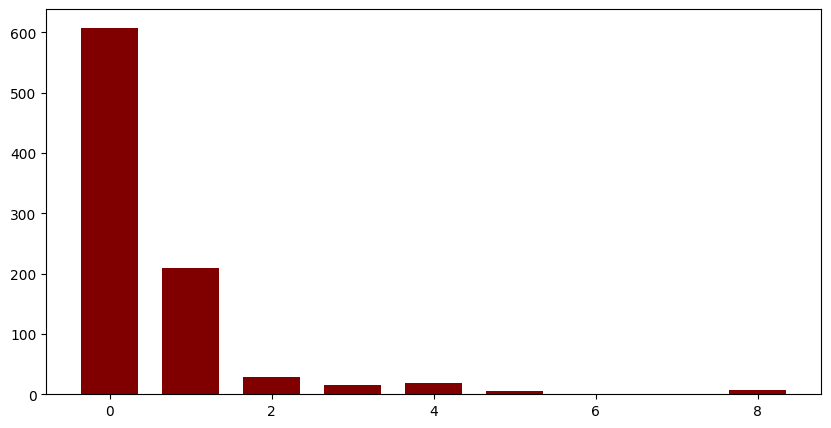

In [20]:
barchart('SibSp')

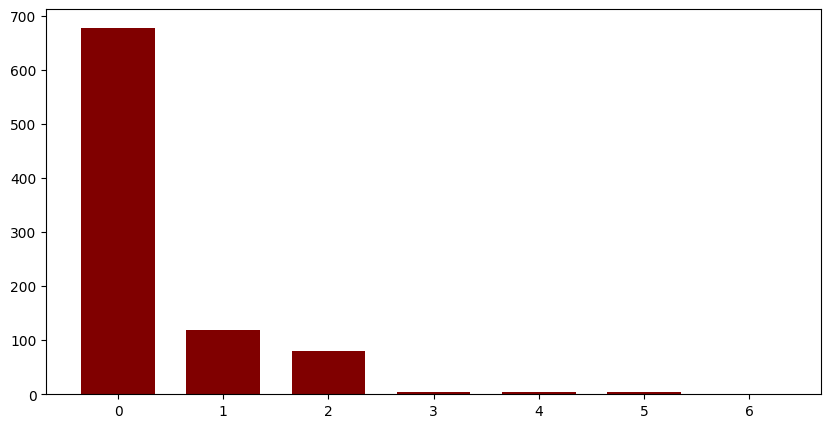

In [21]:
barchart('Parch')

# **Grouped Barchart**

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
survived = train.groupby(['Survived','Sex']).count()['PassengerId'].reset_index()

In [24]:
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [25]:
def group_barchart(column):
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived , kind = 'bar',
      x = 'Survived', y='PassengerId', hue = column,
      palette = 'dark', height = 6
  )

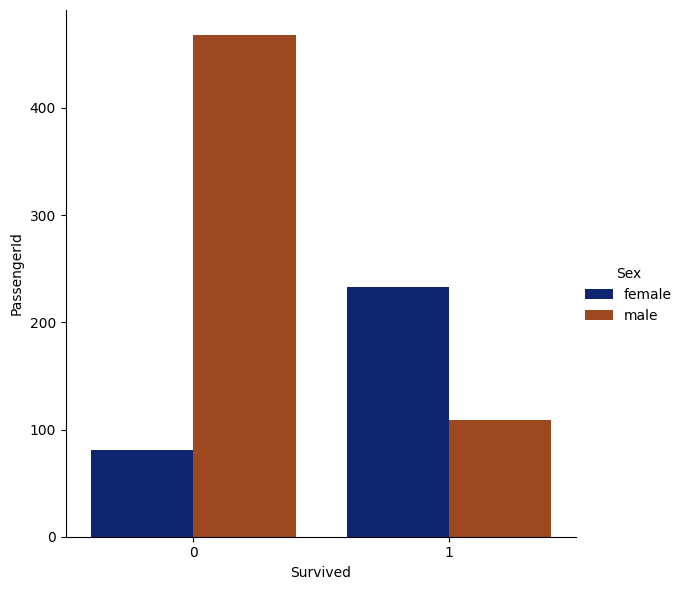

In [26]:
group_barchart('Sex')

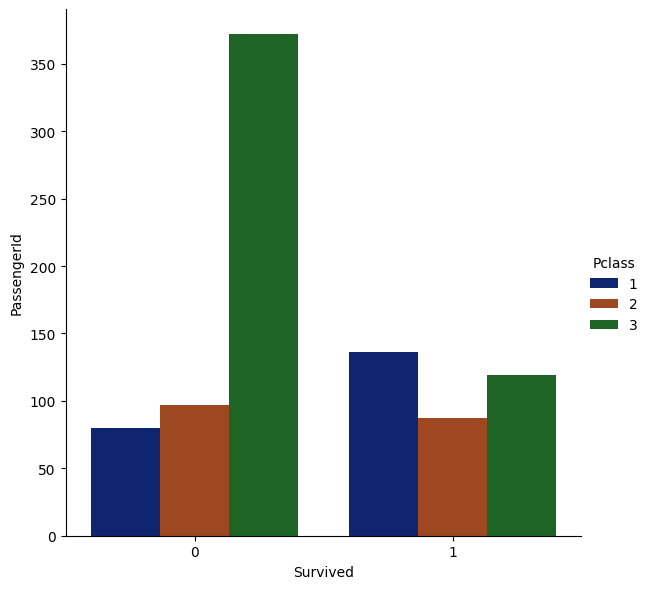

In [27]:
group_barchart('Pclass')

# **HISTOGRAM**

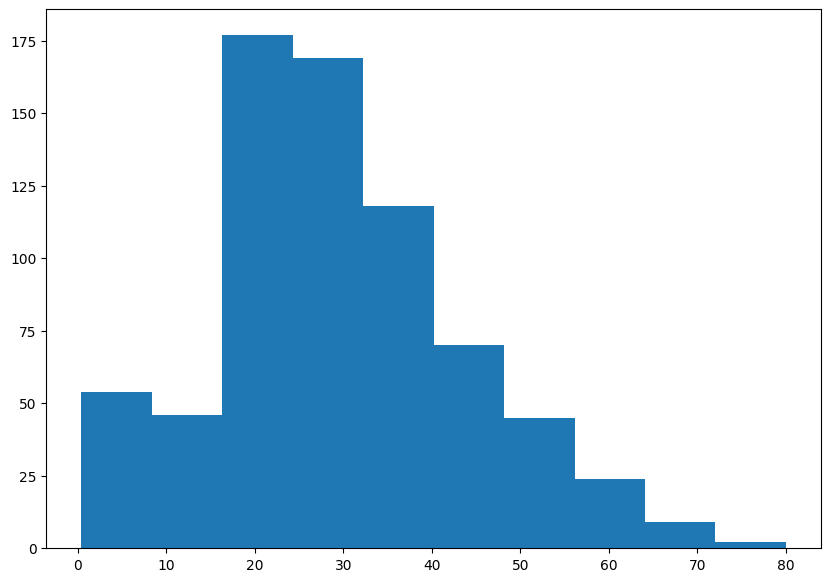

In [28]:
fig , ax = plt.subplots(figsize = (10,7))
ax.hist(train.Age)

plt.show()

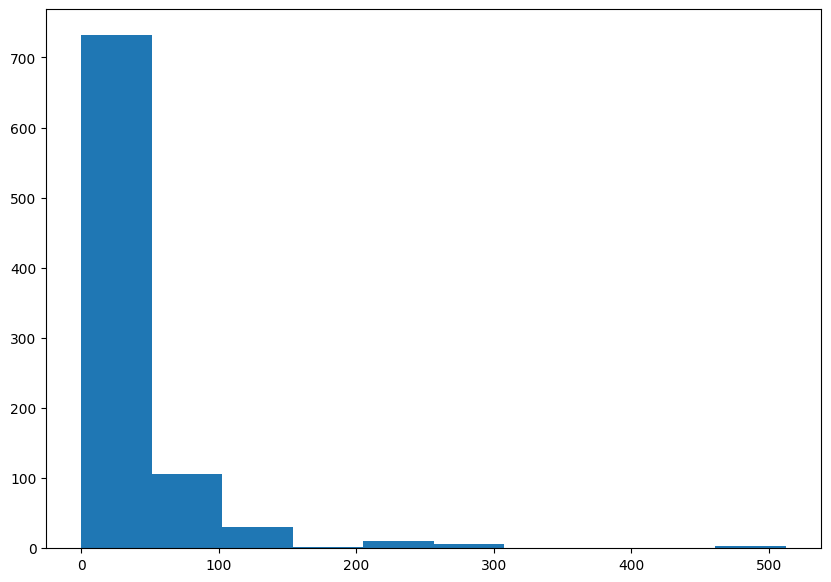

In [29]:
fig , ax = plt.subplots(figsize = (10,7))
ax.hist(train.Fare)

plt.show()

# **KDE PLOT**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


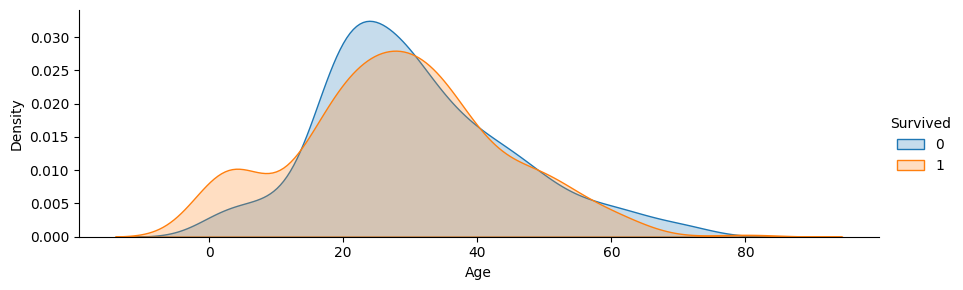

In [30]:
facet = sns.FacetGrid(train , hue = 'Survived',aspect = 3)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


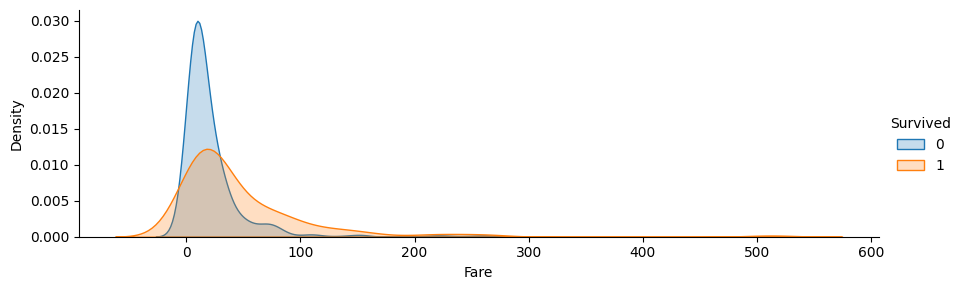

In [31]:
facet = sns.FacetGrid(train , hue = 'Survived',aspect = 3)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


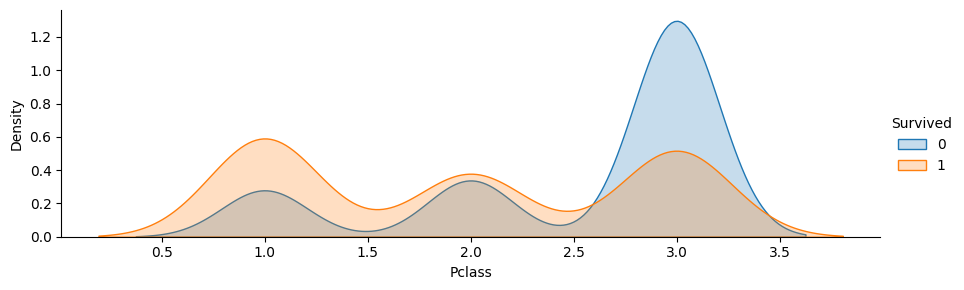

In [32]:
facet = sns.FacetGrid(train , hue = 'Survived',aspect = 3)
facet.map(sns.kdeplot, 'Pclass', fill=True)
facet.add_legend()
plt.show()

# **FILL MISSING VALUE**

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Categorical**

# Isi data null pada Embarked

In [36]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [37]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
modus_embarked = train['Embarked'].mode()[0]
modus_embarked

'S'

In [39]:
train['Embarked'] = train['Embarked'].fillna(modus_embarked)

In [40]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [41]:
train[train['Embarked'].index == 61]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


# Missing Value Data Age

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [44]:
train['Age'] = train['Age'].fillna(mean_age)

In [45]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [46]:
test['Age'] = test['Age'].fillna(mean_age_test)

#missing value Fare

In [47]:
mean_fare = train['Fare'].mean()
mean_fare

32.204207968574636

In [48]:
train['Fare'] = train['Fare'].fillna(mean_fare)

In [49]:
train['Fare'].isnull().sum()

0

In [50]:
test['Fare'] = test['Fare'].fillna(mean_fare)

# Drop Data Cabin karena terlalu banyak missing value

In [51]:
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [52]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Convert data to numeric**

Convert Data Sex (Binary Converting)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
sex_mapping = {'male' : 1, 'female' : 0}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


#Convert Data Embarked

In [58]:
embarked = train[['Embarked']]
dummies = pd.get_dummies(embarked)
dummies = dummies.astype(int)
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [60]:
train = pd.merge(train.reset_index(),dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [61]:
train = train.drop(['index','Embarked'],axis = 1)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [63]:
embarked_test = test[['Embarked']]
dummies_test = pd.get_dummies(embarked_test)
dummies_test = dummies_test.astype(int)
dummies_test.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [64]:
test = pd.merge(test.reset_index(),dummies_test.reset_index())
test = test.drop(['index','Embarked'],axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


# Ekstrak Data title from name and convert tittle

In [65]:
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,Mrs


In [67]:
train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\. ', expand = False)

In [68]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [69]:
train[['title']].value_counts()

title   
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
Name: count, dtype: int64

# Title mapping

In [70]:
title_mapping = {"Mr": 0,
                 "Miss": 1,
                 "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['title'] = train['title'].map(title_mapping)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [72]:
test['title'] = test['title'].map(title_mapping)

In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,2


# **Select Column**

In [74]:
train.shape, test.shape

((891, 14), (418, 13))

In [75]:
train = train.drop(['PassengerId','Name','Ticket'],axis = 1)
test_id = test[['PassengerId']]

test = test.drop(['PassengerId','Name','Ticket'],axis = 1)

In [76]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [77]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


# **MODELLING**

In [78]:
train.shape, test.shape

((891, 11), (418, 10))

In [79]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [80]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


In [81]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [82]:
train_data = train.drop(['Survived'], axis = 1)
target = train['Survived']

In [83]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score_GNB = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_GNB)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [84]:
score_GNB.mean()

0.7991212102190698

In [85]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score_DT = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_DT)

[0.73184358 0.79775281 0.78651685 0.76966292 0.79775281]


In [86]:
score_DT.mean()

0.7767057937354842

# **PREDICTION USING GAUSSIAN NB (HIGHER ACCURACY THAN DT IN THIS CASE)**

In [87]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


In [88]:
clf = GaussianNB()
clf.fit(train_data,target)

GaussianNB()

In [89]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
title         0
dtype: int64

In [90]:
prediction = clf.predict(test)

In [91]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv', encoding='latin-1')
submission = pd.DataFrame({
    "PassengerId" : df_test['PassengerId'],
    "Survived" : prediction
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
submission.to_csv('submit.csv', index = False)

In [93]:
test['Survived'] = submission['Survived']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title,Survived
0,3,1,34.5,0,0,7.8292,0,1,0,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2,1
2,2,1,62.0,0,0,9.6875,0,1,0,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0,0
4,3,0,22.0,1,1,12.2875,0,0,1,2,1
